<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Project: Donald Trump</title>
    <style>
        /* CSS styles for header */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }
        .header {
            background-color: #007bff;
            color: white;
            padding: 20px;
            text-align: center;
        }
        .header h1 {
            margin: 0;
            font-size: 24px;
        }
        .header p {
            margin: 5px 0;
            font-size: 18px;
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Project: Analysis of Donald Trump's Tweets</h1>
        <p>Group members: Adam, Ricardo, Aniq</p>
    </div>
</body>


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Project Overview</title>
    <style>
        /* CSS styles for overview */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f2f2f2;
        }
        .container {
            max-width: 800px;
            margin: 50px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #007bff;
        }
        p {
            font-size: 16px;
            line-height: 1.5;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Project Overview</h2>
        <p>Explore this dataset by using Spark, to analyze the communication on social media of other public figures.You should present your keys findings in form of lists, tables, or visualizations. You can have bonus points by providing more visual results (e.g., charts, word clouds) by using python libraries such as seaborn (or others)</p>
        <h3>Key Points:</h3>
        <ol>
            <li>Point 1: Top positives and top negatives words used</li>
            <li>Point 2: Overall sentiment scores (from positives and negatives words)</li>
            <li>Point 3: Top contextual words or hot topics (e.g. covid-19) and associated
opinions...</li>
            <li>Point 4: Top hashtags (#) cited</li>
            <li>Point 5: Top references (@) cited</li>
            <li>Extra: Spark NLP</li>
            </br>
        </ol>
    </div>
</body>
</html>


You can run and uncomment the below codes to correctly set up your enviroment. Remember you can install with pip codes on the IDE terminal too!

In [1]:
# for installing pyspark
!pip install pyspark==3.0.0
#!pip install spark-nlp
#!pip install spark-nlp-display

Here we set up the spark context that we will run our below sessions in.

In [2]:
# we import pyspark and create a spark context for our distributed processing application

import pyspark

sc = pyspark.SparkContext(appName="Donald-Trump").getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/29 16:30:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


You can uncomment this and run it if you face an error below or start a new context by mistake. You can only run one context at a time so you can run this to stop it if you face errors. However if you run the code how we designed it, then this won't be neccesary.

In [33]:
#sc.stop()



Here we load in our first text file.

In [3]:
# read an existing text file (potentially very huge) in a distributed collection and print one line

tweet_words_df = sc.textFile('/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt')

tweet_words_df.take(1)


['Republicans and Democrats have both created our economic problems.;02/08/2011 18:07:48']

24/02/29 16:30:36 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


Here we load in our second text file.

In [4]:
positive_words_df = sc.textFile('/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/positive-words.txt')

positive_words_df.take(1)

['a+']

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        /* CSS styles for overview */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f2f2f2;
        }
        .container {
            max-width: 800px;
            margin: 50px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #007bff;
        }
        p {
            font-size: 16px;
            line-height: 1.5;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Point 1: Top positives and top negatives words used</h2>
       
</body>

install seaborn if you dont have it - we will be using it for most of our graphing.

In [ ]:
#pip install seaborn matplotlib

Below you will see some graphs and visualisations of the words used.

+----------+-----+
|      word|count|
+----------+-----+
|     great| 3897|
|      like| 1743|
|      good| 1186|
|      best|  868|
|      love|  825|
|      work|  655|
|     right|  622|
|    better|  613|
|       win|  559|
|   support|  482|
| wonderful|  436|
|    strong|  404|
|      well|  390|
|     honor|  364|
|     thank|  353|
|   amazing|  349|
| important|  338|
| beautiful|  318|
|incredible|  301|
|      nice|  294|
+----------+-----+
only showing top 20 rows



/var/folders/vn/cc7txpfd13n_6z08g5s2xs_80000gn/T/ipykernel_73723/2974936349.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_positive_words_pd, palette='viridis')


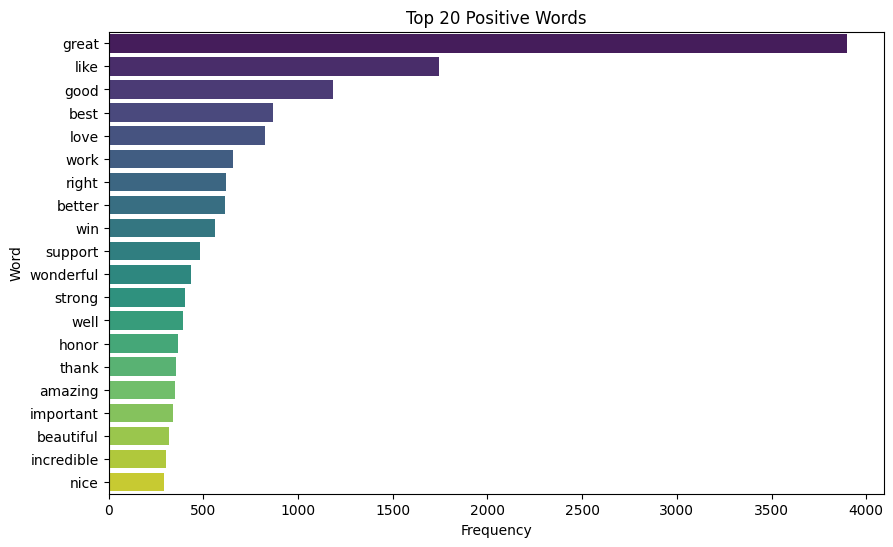

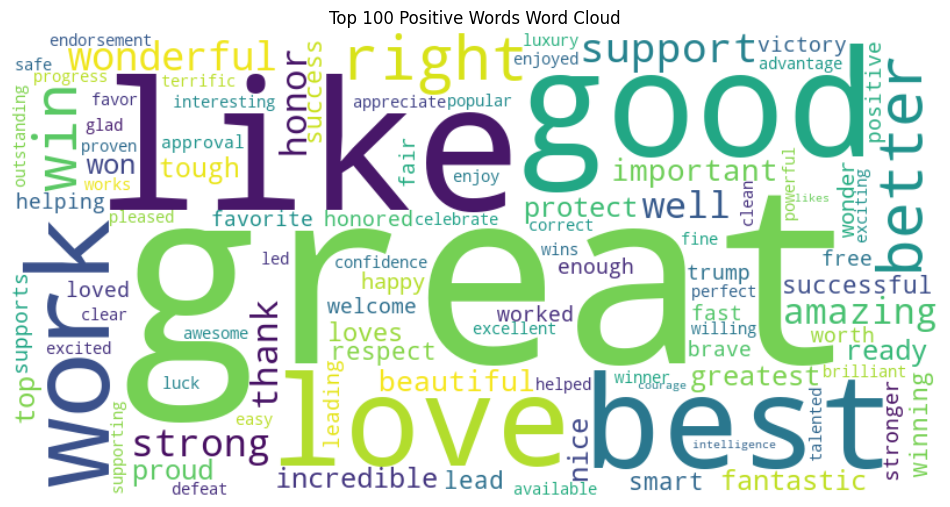

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, col

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Top Positive Words") \
    .getOrCreate()

# Load tweets and positive words from text files
tweets_df = spark.read.text("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt")
positive_words_df = spark.read.text("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/positive-words.txt")

# Tokenize tweets into words
tweet_words_df = tweets_df.select(explode(split(col("value"), " ")).alias("word"))

# Tokenize positive words
positive_words = positive_words_df.rdd.flatMap(lambda x: x).collect()

# Filter out positive words from tweets
positive_tweets_df = tweet_words_df.filter(tweet_words_df.word.isin(positive_words))

# Count occurrences of each positive word
positive_word_counts = positive_tweets_df.groupBy("word").count()

# Sort positive words based on their counts
top_positive_words = positive_word_counts.orderBy("count", ascending=False)

# Show top positive words
top_positive_words.show()



#############
# Bar Plot

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
# We only take the top 20 to save processing time and using up resources!
top_positive_words_pd = top_positive_words.limit(20).toPandas()

# Visualization 1: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_positive_words_pd, palette='viridis')
plt.title('Top 20 Positive Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


############

############
# Word Cloud

# Convert the PySpark DataFrame to a Pandas DataFrame
cloud_top_positive_words_pd = top_positive_words.limit(100).toPandas()

# Convert the DataFrame to a dictionary where keys are words and values are frequencies
word_freq_dict = dict(zip(cloud_top_positive_words_pd['word'], cloud_top_positive_words_pd['count']))

# Visualization 2: Word Cloud
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 100 Positive Words Word Cloud')
plt.axis('off')
plt.show()

############


# Stop SparkSession
spark.stop()

Here you can see the most used positive words that Trump used. Seems like everything is going "Great" here...

+---------+-----+
|     word|count|
+---------+-----+
|      bad|  670|
|     hard|  577|
|     lost|  293|
|  illegal|  293|
| terrible|  259|
|   attack|  221|
|    worst|  213|
|   failed|  209|
|    phony|  190|
|  corrupt|  190|
|    wrong|  172|
|    crime|  171|
|    badly|  168|
|     weak|  167|
|  failing|  163|
|  destroy|  159|
|     hate|  156|
|   killed|  147|
|dishonest|  146|
|  problem|  141|
+---------+-----+
only showing top 20 rows



/var/folders/vn/cc7txpfd13n_6z08g5s2xs_80000gn/T/ipykernel_73723/4151470208.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_negative_words_pd, palette='viridis')


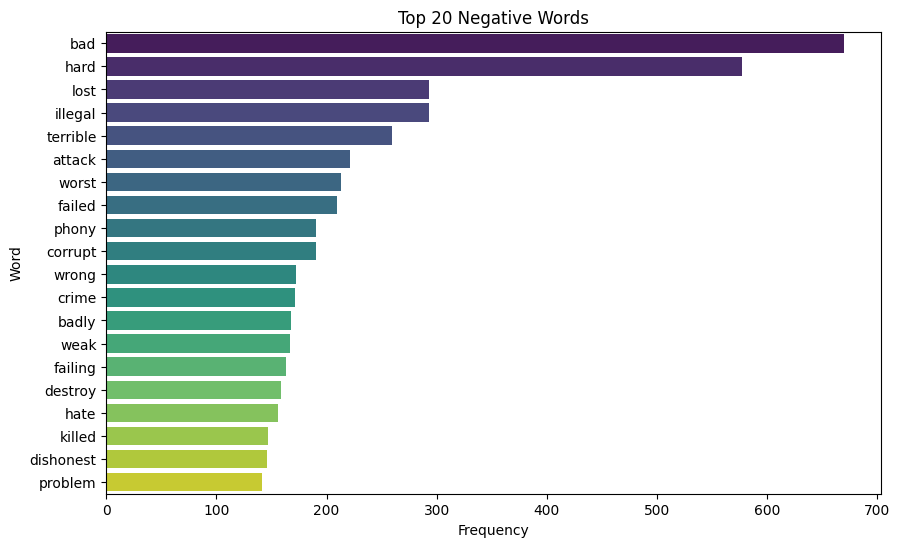

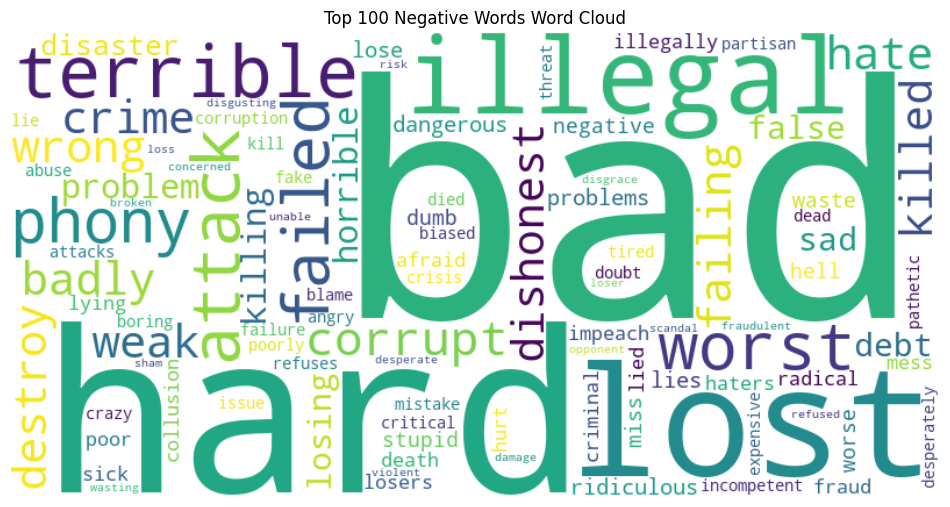

In [6]:
#change colour scheme to show negatibe better

from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, col

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Top Negative Words") \
    .getOrCreate()

# Load tweets and positive words from text files
tweets_df = spark.read.text("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt")
negative_words_df = spark.read.text("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/negative-words.txt")

# Tokenize tweets into words
tweet_words_df = tweets_df.select(explode(split(col("value"), " ")).alias("word"))

# Tokenize positive words
negative_words = negative_words_df.rdd.flatMap(lambda x: x).collect()

# Filter out positive words from tweets
negative_tweets_df = tweet_words_df.filter(tweet_words_df.word.isin(negative_words))

# Count occurrences of each positive word
negative_word_counts = negative_tweets_df.groupBy("word").count()

# Sort positive words based on their counts
top_negative_words = negative_word_counts.orderBy("count", ascending=False)

# Show top positive words
top_negative_words.show()


#############

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
top_negative_words_pd = top_negative_words.limit(20).toPandas()

# Visualization 1: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_negative_words_pd, palette='viridis')
plt.title('Top 20 Negative Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


############

############

# Convert the PySpark DataFrame to a Pandas DataFrame
cloud_top_negative_words_pd = top_negative_words.limit(100).toPandas()

# Convert the DataFrame to a dictionary where keys are words and values are frequencies
word_freq_dict = dict(zip(cloud_top_negative_words_pd['word'], cloud_top_negative_words_pd['count']))

# Visualization 2: Word Cloud
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 100 Negative Words Word Cloud')
plt.axis('off')
plt.show()

############

# Stop SparkSession
spark.stop()

Just like before we can see the table then graphed as a barchart and then as a word cloud.

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        /* CSS styles for overview */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f2f2f2;
        }
        .container {
            max-width: 800px;
            margin: 50px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #007bff;
        }
        p {
            font-size: 16px;
            line-height: 1.5;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Point 2: Overall sentiment scores (Using Vader Sentiment)</h2>
       
</body>

Here we demonstrate NLP using the NLTK library and vader lexicon.

In [7]:
import nltk
nltk.download('vader_lexicon')

#/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/NRCEmotionD.txt


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

Make sure to have all the correct packages downloaded and be connected to the internet to run the above chunk

Below we create a spark session where we run this program to extract parts of the tweet and give them a sentiment score. From there we can group the sentiments into positive negative and nuetral categories. The below is using NLP.

In [8]:
#Sentiment Before Sort (will provide sort to show analysis is working well on both sides of spectrum )
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("VADER Sentiment Analysis") \
    .getOrCreate()

# Initialize VADER Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Load tweet data from file into an RDD
tweets_rdd = spark.sparkContext.textFile("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt")

# Perform sentiment analysis on each tweet
def analyze_sentiment(tweet):
    sentiment_score = sid.polarity_scores(tweet)["compound"]
    return tweet, sentiment_score

sentiment_scores_rdd = tweets_rdd.map(analyze_sentiment)

# Convert RDD to DataFrame for visualization
sentiment_scores_df = spark.createDataFrame(sentiment_scores_rdd, ["Tweet", "Sentiment"])

# Show sample results
sentiment_scores_df.show()

# Stop SparkSession
spark.stop()


24/02/29 16:31:25 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 1 (TID 1): Attempting to kill Python Worker


+--------------------+---------+
|               Tweet|Sentiment|
+--------------------+---------+
|Republicans and D...|     0.25|
|I was thrilled to...|   0.9792|
|RT @CBS_Herridge:...|      0.0|
|The Unsolicited M...|  -0.9286|
|RT @MZHemingway: ...|   0.5413|
|RT @WhiteHouse: P...|    0.636|
|“I’m running as a...|      0.0|
|Getting a little ...|      0.0|
|https://t.co/4qwC...|      0.0|
|https://t.co/VlEu...|      0.0|
|https://t.co/z5CR...|      0.0|
|https://t.co/TQCQ...|      0.0|
|RT @EricTrump: ht...|      0.0|
|"RT @GOPChairwoma...|      0.0|
|                    |      0.0|
|273K jobs added i...|      0.0|
|                    |      0.0|
|7M+ jobs added si...|      0.0|
|                    |      0.0|
|Unemploym…";08/03...|      0.0|
+--------------------+---------+
only showing top 20 rows



Below we sort the sentiments to show the psotive sentiments - this also allows us to see our code is legitimate. Here we see that the psotive scores are indeed positive sentences.

In [9]:
#showing top sentiment sorted
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("VADER Sentiment Analysis") \
    .getOrCreate()

# Initialize VADER Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Load tweet data from file into an RDD
tweets_rdd = spark.sparkContext.textFile("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt")

# Perform sentiment analysis on each tweet
def analyze_sentiment(tweet):
    sentiment_score = sid.polarity_scores(tweet)["compound"]
    return tweet, sentiment_score

sentiment_scores_rdd = tweets_rdd.map(analyze_sentiment)

# Convert RDD to DataFrame for visualization
sentiment_scores_df = spark.createDataFrame(sentiment_scores_rdd, ["Tweet", "Sentiment"])

# Order sentiment scores in descending order
sentiment_scores_df = sentiment_scores_df.orderBy("Sentiment", ascending=False)

# Show sample results
sentiment_scores_df.show()

# Stop SparkSession
spark.stop()


+--------------------+---------+
|               Tweet|Sentiment|
+--------------------+---------+
|I am a big fan of...|   0.9879|
|Today, it was my ...|   0.9879|
|It was great to b...|   0.9876|
|Congratulations t...|   0.9874|
|95% Approval Rati...|   0.9869|
|Good luck and bes...|   0.9857|
|We are all united...|   0.9856|
|Congratulations t...|   0.9837|
|My supporters are...|   0.9834|
|I want to express...|   0.9832|
|It was my great h...|   0.9831|
|Will be with our ...|   0.9828|
|I would like to e...|   0.9825|
|I am at Camp Davi...|   0.9825|
|Congratulations t...|   0.9825|
|Today we celebrat...|   0.9821|
|On this day of pr...|    0.982|
|Academy Award win...|   0.9816|
|Thank you, @WVGov...|   0.9816|
|Thank you for all...|   0.9813|
+--------------------+---------+
only showing top 20 rows



Likewise, we view the negative sentiments in the same way below.

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("VADER Sentiment Analysis") \
    .getOrCreate()

# Initialize VADER Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Load tweet data from file into an RDD
tweets_rdd = spark.sparkContext.textFile("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt")

# Perform sentiment analysis on each tweet
def analyze_sentiment(tweet):
    sentiment_score = sid.polarity_scores(tweet)["compound"]
    return tweet, sentiment_score

sentiment_scores_rdd = tweets_rdd.map(analyze_sentiment)

# Convert RDD to DataFrame for visualization
sentiment_scores_df = spark.createDataFrame(sentiment_scores_rdd, ["Tweet", "Sentiment"])

# Order sentiment scores in ascending order (from lowest to highest)
sentiment_scores_df = sentiment_scores_df.orderBy("Sentiment", ascending=True)

# Show sample results
sentiment_scores_df.show()

# Stop SparkSession
spark.stop()


+--------------------+---------+
|               Tweet|Sentiment|
+--------------------+---------+
|It is outrageous ...|  -0.9844|
|Colin Powell was ...|    -0.98|
|According to pres...|   -0.979|
|The Rigged Russia...|  -0.9785|
|At the request of...|  -0.9783|
|Failed RINO forme...|  -0.9759|
|....employment nu...|  -0.9756|
|Who is Miles Tayl...|  -0.9754|
|The Trump portrai...|  -0.9747|
|James Comey is a ...|  -0.9742|
|I use Social Medi...|  -0.9736|
|Our prayers are w...|  -0.9735|
|Where’s the Collu...|   -0.972|
|Why should I be d...|  -0.9713|
|This is an illega...|  -0.9711|
|The illegal Muell...|  -0.9696|
|23% of Federal in...|  -0.9694|
|.@NBCNews is bad ...|   -0.969|
|Nancy Pelosi’s Di...|  -0.9689|
|Do you notice the...|  -0.9689|
+--------------------+---------+
only showing top 20 rows



Now we group and graph them on a barchart.

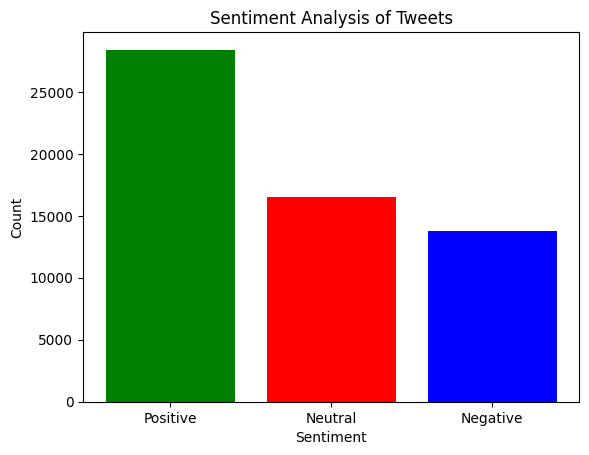

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("VADER Sentiment Analysis") \
    .getOrCreate()

# Initialize VADER Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Load tweet data from file into an RDD
tweets_rdd = spark.sparkContext.textFile("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt")

# Perform sentiment analysis on each tweet and categorize them
def categorize_sentiment(tweet):
    sentiment_score = sid.polarity_scores(tweet)["compound"]
    if sentiment_score > 0.05:
        return "Positive"
    elif sentiment_score < -0.05:
        return "Negative"
    else:
        return "Neutral"

sentiment_categories_rdd = tweets_rdd.map(categorize_sentiment)

# Count the occurrences of each sentiment category
sentiment_counts = sentiment_categories_rdd.countByValue()

# Prepare data for plotting
labels = sentiment_counts.keys()
counts = sentiment_counts.values()

# Plot the bar chart
plt.bar(labels, counts, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Tweets')
plt.show()

# Stop SparkSession
spark.stop()


Overall, we see that Donald Trump's tweets tend to be mostly conveyed in a positive way followed by being either neutral or negative.

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        /* CSS styles for overview */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f2f2f2;
        }
        .container {
            max-width: 800px;
            margin: 50px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #007bff;
        }
        p {
            font-size: 16px;
            line-height: 1.5;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Point 3: Top contextual words or hot topics (e.g. covid-19) and associated
opinions...</h2>
       
</body>

Below we will show you the top used contextual words.

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lower, split, explode
from pyspark.ml.feature import StopWordsRemover

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("TwitterAnalysis") \
    .getOrCreate()

# Load stop words
stop_words_path = "/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/english"
stop_words = set(spark.read.text(stop_words_path).rdd.map(lambda x: x.value).collect())

# Load tweets
tweets_path = "/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt"
tweets_df = spark.read.text(tweets_path)

# Tokenize tweets and remove stop words
tweets_df = tweets_df.withColumn("words", split(lower(tweets_df["value"]), " "))
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=list(stop_words))
tweets_df = remover.transform(tweets_df).select(explode("filtered_words").alias("word"))

# WE NEED TO SUPERVISE THIS AND DO SOME CHANGES
# For instance we take out blank spaces

# Filter out empty strings
tweets_df = tweets_df.filter(tweets_df.word != '')

# Filter out "-" //You need to pay attention
tweets_df = tweets_df.filter(tweets_df.word != '-')

# Count the occurrence of each word
word_counts = tweets_df.groupBy("word").count()

# Get the top contextual words or hot topics
top_words = word_counts.orderBy("count", ascending=False)

# Show top words
top_words.show(10)

# Stop SparkSession
spark.stop()


+----------------+-----+
|            word|count|
+----------------+-----+
|@realdonaldtrump| 8713|
|              rt| 7895|
|           great| 6532|
|           trump| 4418|
|           &amp,| 4261|
|           thank| 3417|
|       president| 3275|
|          people| 2674|
|             new| 2409|
|           would| 2314|
+----------------+-----+
only showing top 10 rows



Above we see the top used contextual words.

Below we see an interesting analysis of observations of contextual words and their occurences. WARNING! This may only work if you are running the latest versions of Jupyter, Python or IDE. We can not see the data on Visual Studio Code but have seen the visualization on some versions of Jupyter...

Error: The number of observations cannot be determined on an empty distance matrix.


<Figure size 1200x800 with 0 Axes>

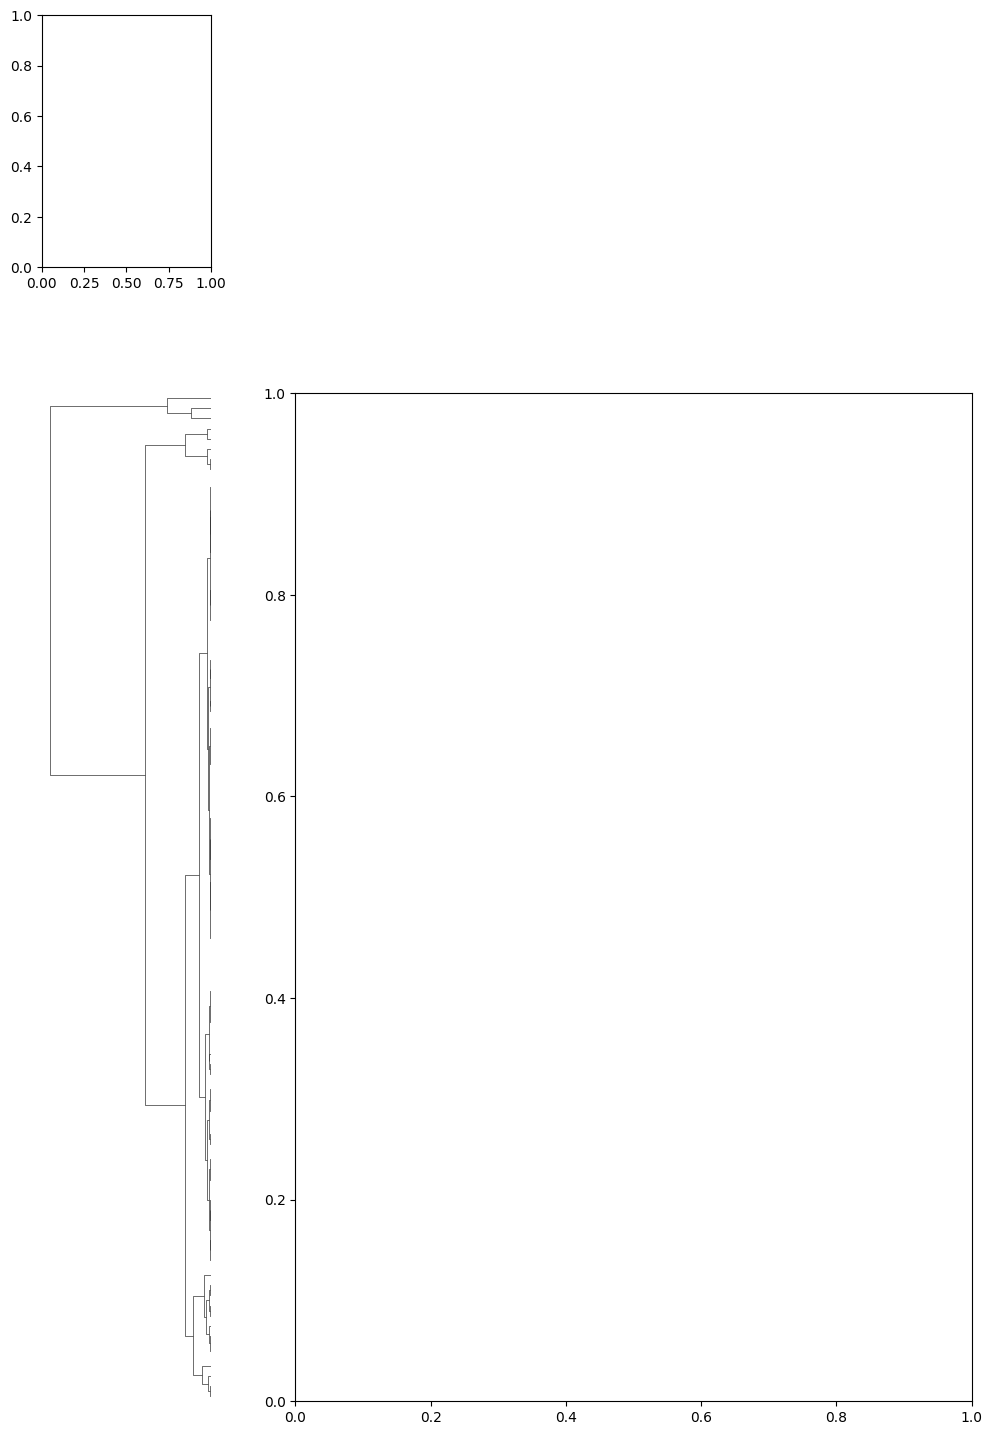

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import lower, split, explode
from pyspark.ml.feature import StopWordsRemover

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("TwitterAnalysis") \
    .getOrCreate()

# Load stop words
stop_words_path = "/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/english"
stop_words = set(spark.read.text(stop_words_path).rdd.map(lambda x: x.value).collect())

# Load tweets
tweets_path = "/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt"
tweets_df = spark.read.text(tweets_path)

# Tokenize tweets and remove stop words
tweets_df = tweets_df.withColumn("words", split(lower(tweets_df["value"]), " "))
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=list(stop_words))
tweets_df = remover.transform(tweets_df).select(explode("filtered_words").alias("word"))

# Filter out empty strings
tweets_df = tweets_df.filter(tweets_df.word != '')

# Count the occurrence of each word
word_counts = tweets_df.groupBy("word").count()

# Get the top 100 contextual words or hot topics
top_words = word_counts.orderBy("count", ascending=False).limit(100)

# Convert Spark DataFrame to Pandas DataFrame
top_words_df = top_words.toPandas()

# Check if the dataframe is empty
if not top_words_df.empty:
    # Cluster map
    plt.figure(figsize=(12, 8))
    try:
        sns.clustermap(top_words_df.set_index('word'), cmap="mako", figsize=(12, 18), linewidths=.5)
        plt.title('Cluster Map of Top 100 Terms')
        plt.show()
    except ValueError as e:
        print(f"Error: {e}")
else:
    print("No data to visualize.")

# Stop SparkSession
spark.stop()


Below we created a heatmap which visualizations the data is different way but conveys a similar understanding of the data.

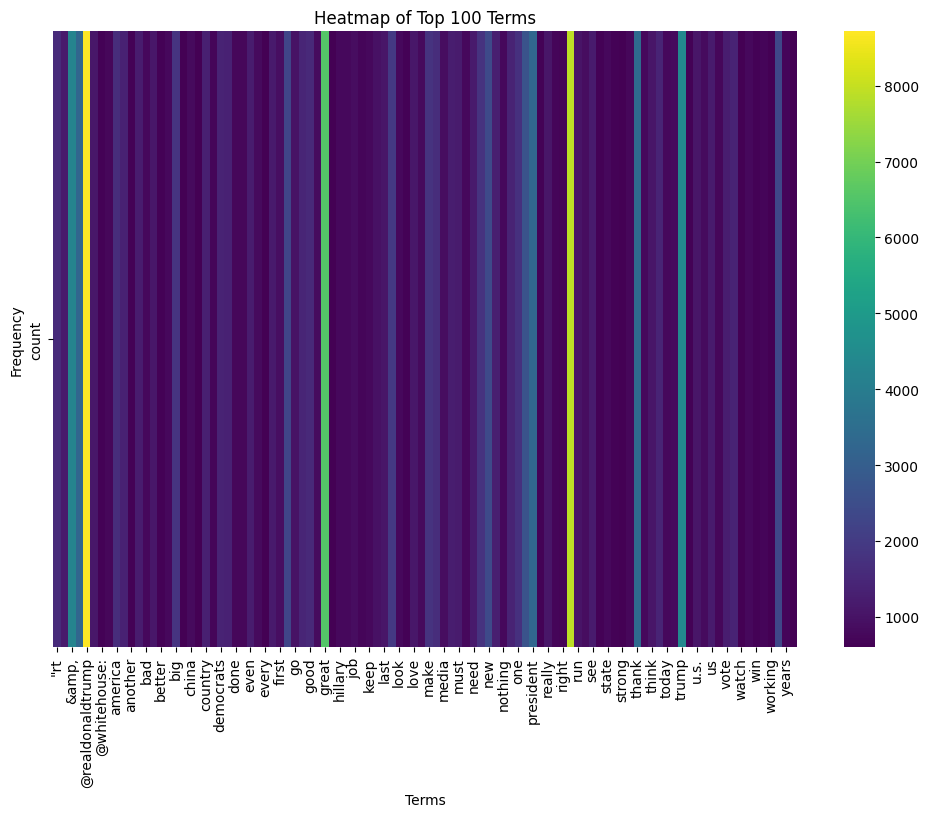

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import lower, split, explode
from pyspark.ml.feature import StopWordsRemover

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("TwitterAnalysis") \
    .getOrCreate()

# Load stop words
stop_words_path = "/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/english"
stop_words = set(spark.read.text(stop_words_path).rdd.map(lambda x: x.value).collect())

# Load tweets
tweets_path = "/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt"
tweets_df = spark.read.text(tweets_path)

# Tokenize tweets and remove stop words
tweets_df = tweets_df.withColumn("words", split(lower(tweets_df["value"]), " "))
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=list(stop_words))
tweets_df = remover.transform(tweets_df).select(explode("filtered_words").alias("word"))

# Filter out empty strings
tweets_df = tweets_df.filter(tweets_df.word != '')

# Count the occurrence of each word
word_counts = tweets_df.groupBy("word").count()

# Get the top 100 contextual words or hot topics
top_words = word_counts.orderBy("count", ascending=False).limit(100)

# Convert Spark DataFrame to Pandas DataFrame
top_words_df = top_words.toPandas()

# Check if the dataframe is empty
if not top_words_df.empty:
    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(top_words_df.pivot_table(index='word', aggfunc='sum').T, cmap="viridis")
    plt.title('Heatmap of Top 100 Terms')
    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No data to visualize.")

# Stop SparkSession
spark.stop()


Just like before we see the same results just visualized in another way.

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        /* CSS styles for overview */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f2f2f2;
        }
        .container {
            max-width: 800px;
            margin: 50px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #007bff;
        }
        p {
            font-size: 16px;
            line-height: 1.5;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Point 4: Top hashtags (#) cited</h2>
       
</body>

Below we show a bargraph of the top hashtags used.

+----------------------+-----+
|word                  |count|
+----------------------+-----+
|#Trump2016            |395  |
|#MAGA                 |340  |
|#MakeAmericaGreatAgain|258  |
|#1                    |108  |
|#CelebApprentice      |95   |
|#CelebrityApprentice  |83   |
|#KAG2020              |61   |
|#AmericaFirst         |61   |
|#Trump2016""""        |59   |
|#Trump                |57   |
+----------------------+-----+



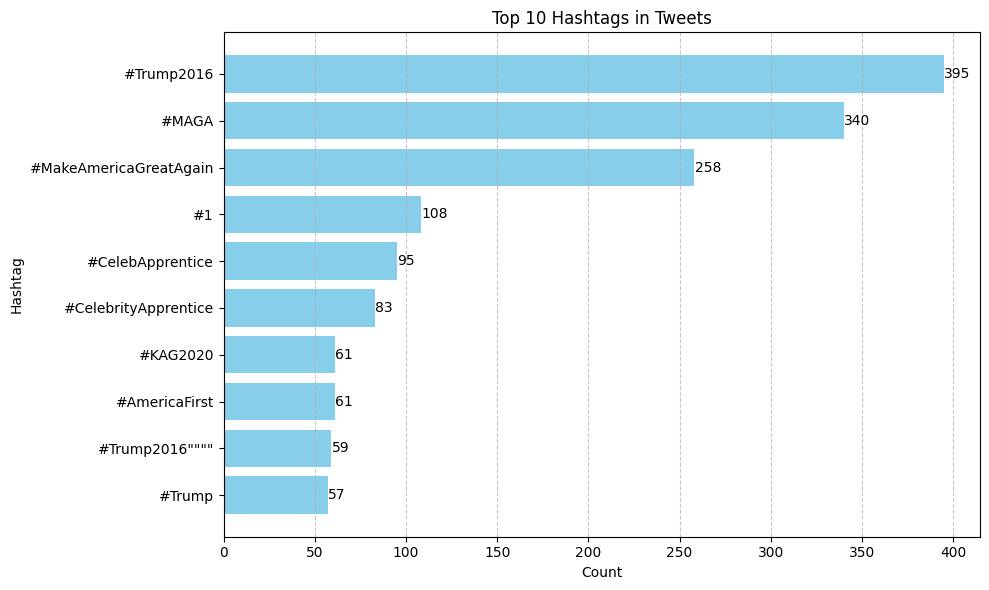

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Hashtag Analysis") \
    .getOrCreate()

# Read the text file containing tweets
tweets_df = spark.read.text("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt")

# Extract hashtags from each tweet
hashtags_df = tweets_df.select(explode(split(tweets_df.value, " ")).alias("word")) \
    .filter("word LIKE '#%'") \
    .groupBy("word") \
    .count()

# Sort the hashtags by count in descending order
sorted_hashtags_df = hashtags_df.orderBy("count", ascending=False)

# Get the top 10 hashtags
top_hashtags_df = sorted_hashtags_df.limit(10)

# Show the top hashtags
top_hashtags_df.show(truncate=False)

################

import matplotlib.pyplot as plt
import pandas as pd

# Assuming top_hashtags_rdd contains the top hashtags RDD data

# Convert RDD to Pandas DataFrame
top_hashtags_pd = pd.DataFrame(top_hashtags_df.collect(), columns=['Hashtag', 'Count'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_hashtags_pd['Hashtag'], top_hashtags_pd['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.title('Top 10 Hashtags in Tweets')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding annotations
for i, count in enumerate(top_hashtags_pd['Count']):
    plt.text(count + 0.2, i, str(count), va='center', color='black')

# Show plot
plt.show()




###############3

# Stop SparkSession
spark.stop()


As one would expect we see the famous lines from Trumps 2016 election.

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        /* CSS styles for overview */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f2f2f2;
        }
        .container {
            max-width: 800px;
            margin: 50px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #007bff;
        }
        p {
            font-size: 16px;
            line-height: 1.5;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Point 5: Top references (@) cited</h2>
       
</body>

Similar to above we show a bargraph of the top references cited.

+-----------------+-----+
|word             |count|
+-----------------+-----+
|@realDonaldTrump |8553 |
|@realDonaldTrump:|1087 |
|@WhiteHouse:     |658  |
|@FoxNews         |519  |
|@BarackObama     |474  |
|@foxandfriends   |449  |
|@ApprenticeNBC   |296  |
|@TeamTrump:      |276  |
|@CNN             |276  |
|@GOPChairwoman:  |212  |
+-----------------+-----+



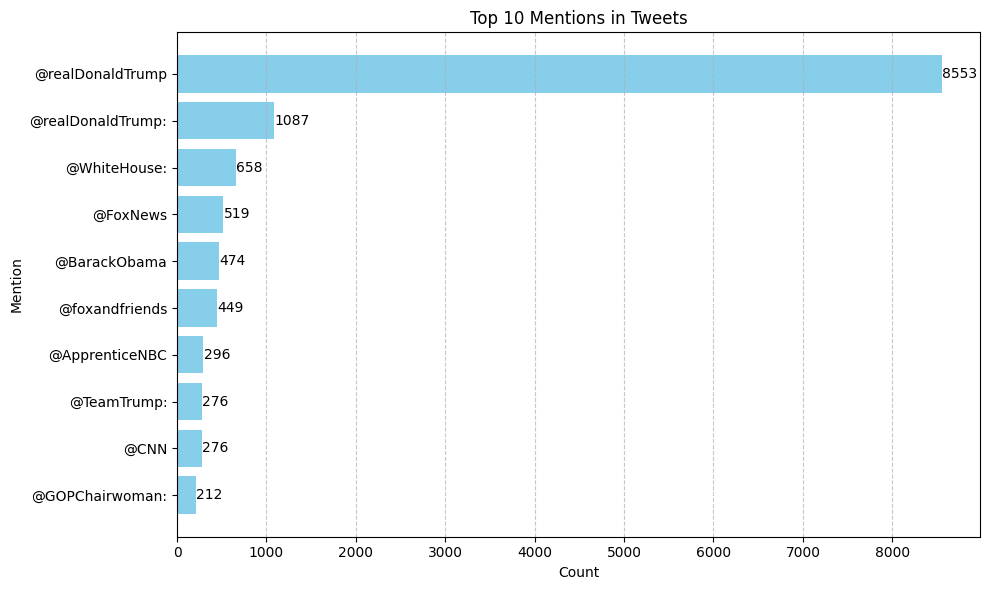

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Mention Analysis") \
    .getOrCreate()

# Read the text file containing tweets
tweets_df = spark.read.text("/Users/adamdanielgreen/Desktop/Python 2/Your Project/Donald Trump/trump_tweets.txt")

# Extract mentions from each tweet
mentions_df = tweets_df.select(explode(split(tweets_df.value, " ")).alias("word")) \
    .filter("word LIKE '@%'") \
    .groupBy("word") \
    .count()

# Sort the mentions by count in descending order
sorted_mentions_df = mentions_df.orderBy("count", ascending=False)

# Get the top 10 mentions
top_mentions_df = sorted_mentions_df.limit(10)

# Show the top mentions
top_mentions_df.show(truncate=False)

#################

import matplotlib.pyplot as plt
import pandas as pd

# Assuming top_mentions_rdd contains the top mentions RDD data

# Convert RDD to Pandas DataFrame
top_mentions_pd = pd.DataFrame(top_mentions_df.collect(), columns=['Mention', 'Count'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_mentions_pd['Mention'], top_mentions_pd['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Mention')
plt.title('Top 10 Mentions in Tweets')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding annotations
for i, count in enumerate(top_mentions_pd['Count']):
    plt.text(count + 0.2, i, str(count), va='center', color='black')

# Show plot
plt.show()




##################

# Stop SparkSession
spark.stop()


From this we can clearly see the "friends" and "enemies" of Trump which he interacts with over twitter.

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        /* CSS styles for overview */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f2f2f2;
        }
        .container {
            max-width: 800px;
            margin: 50px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #007bff;
        }
        p {
            font-size: 16px;
            line-height: 1.5;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>End of Part 1</h2>
       
</body>